In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# set font and figs
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['figure.dpi'] = 500
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = "cm"
plt.rcParams.update({'font.size': 12})

In [3]:
# print working directory
import os
print(os.getcwd())

c:\Users\georg\OneDrive\Documents\Documents\5-MeO-DMT\5_EEG


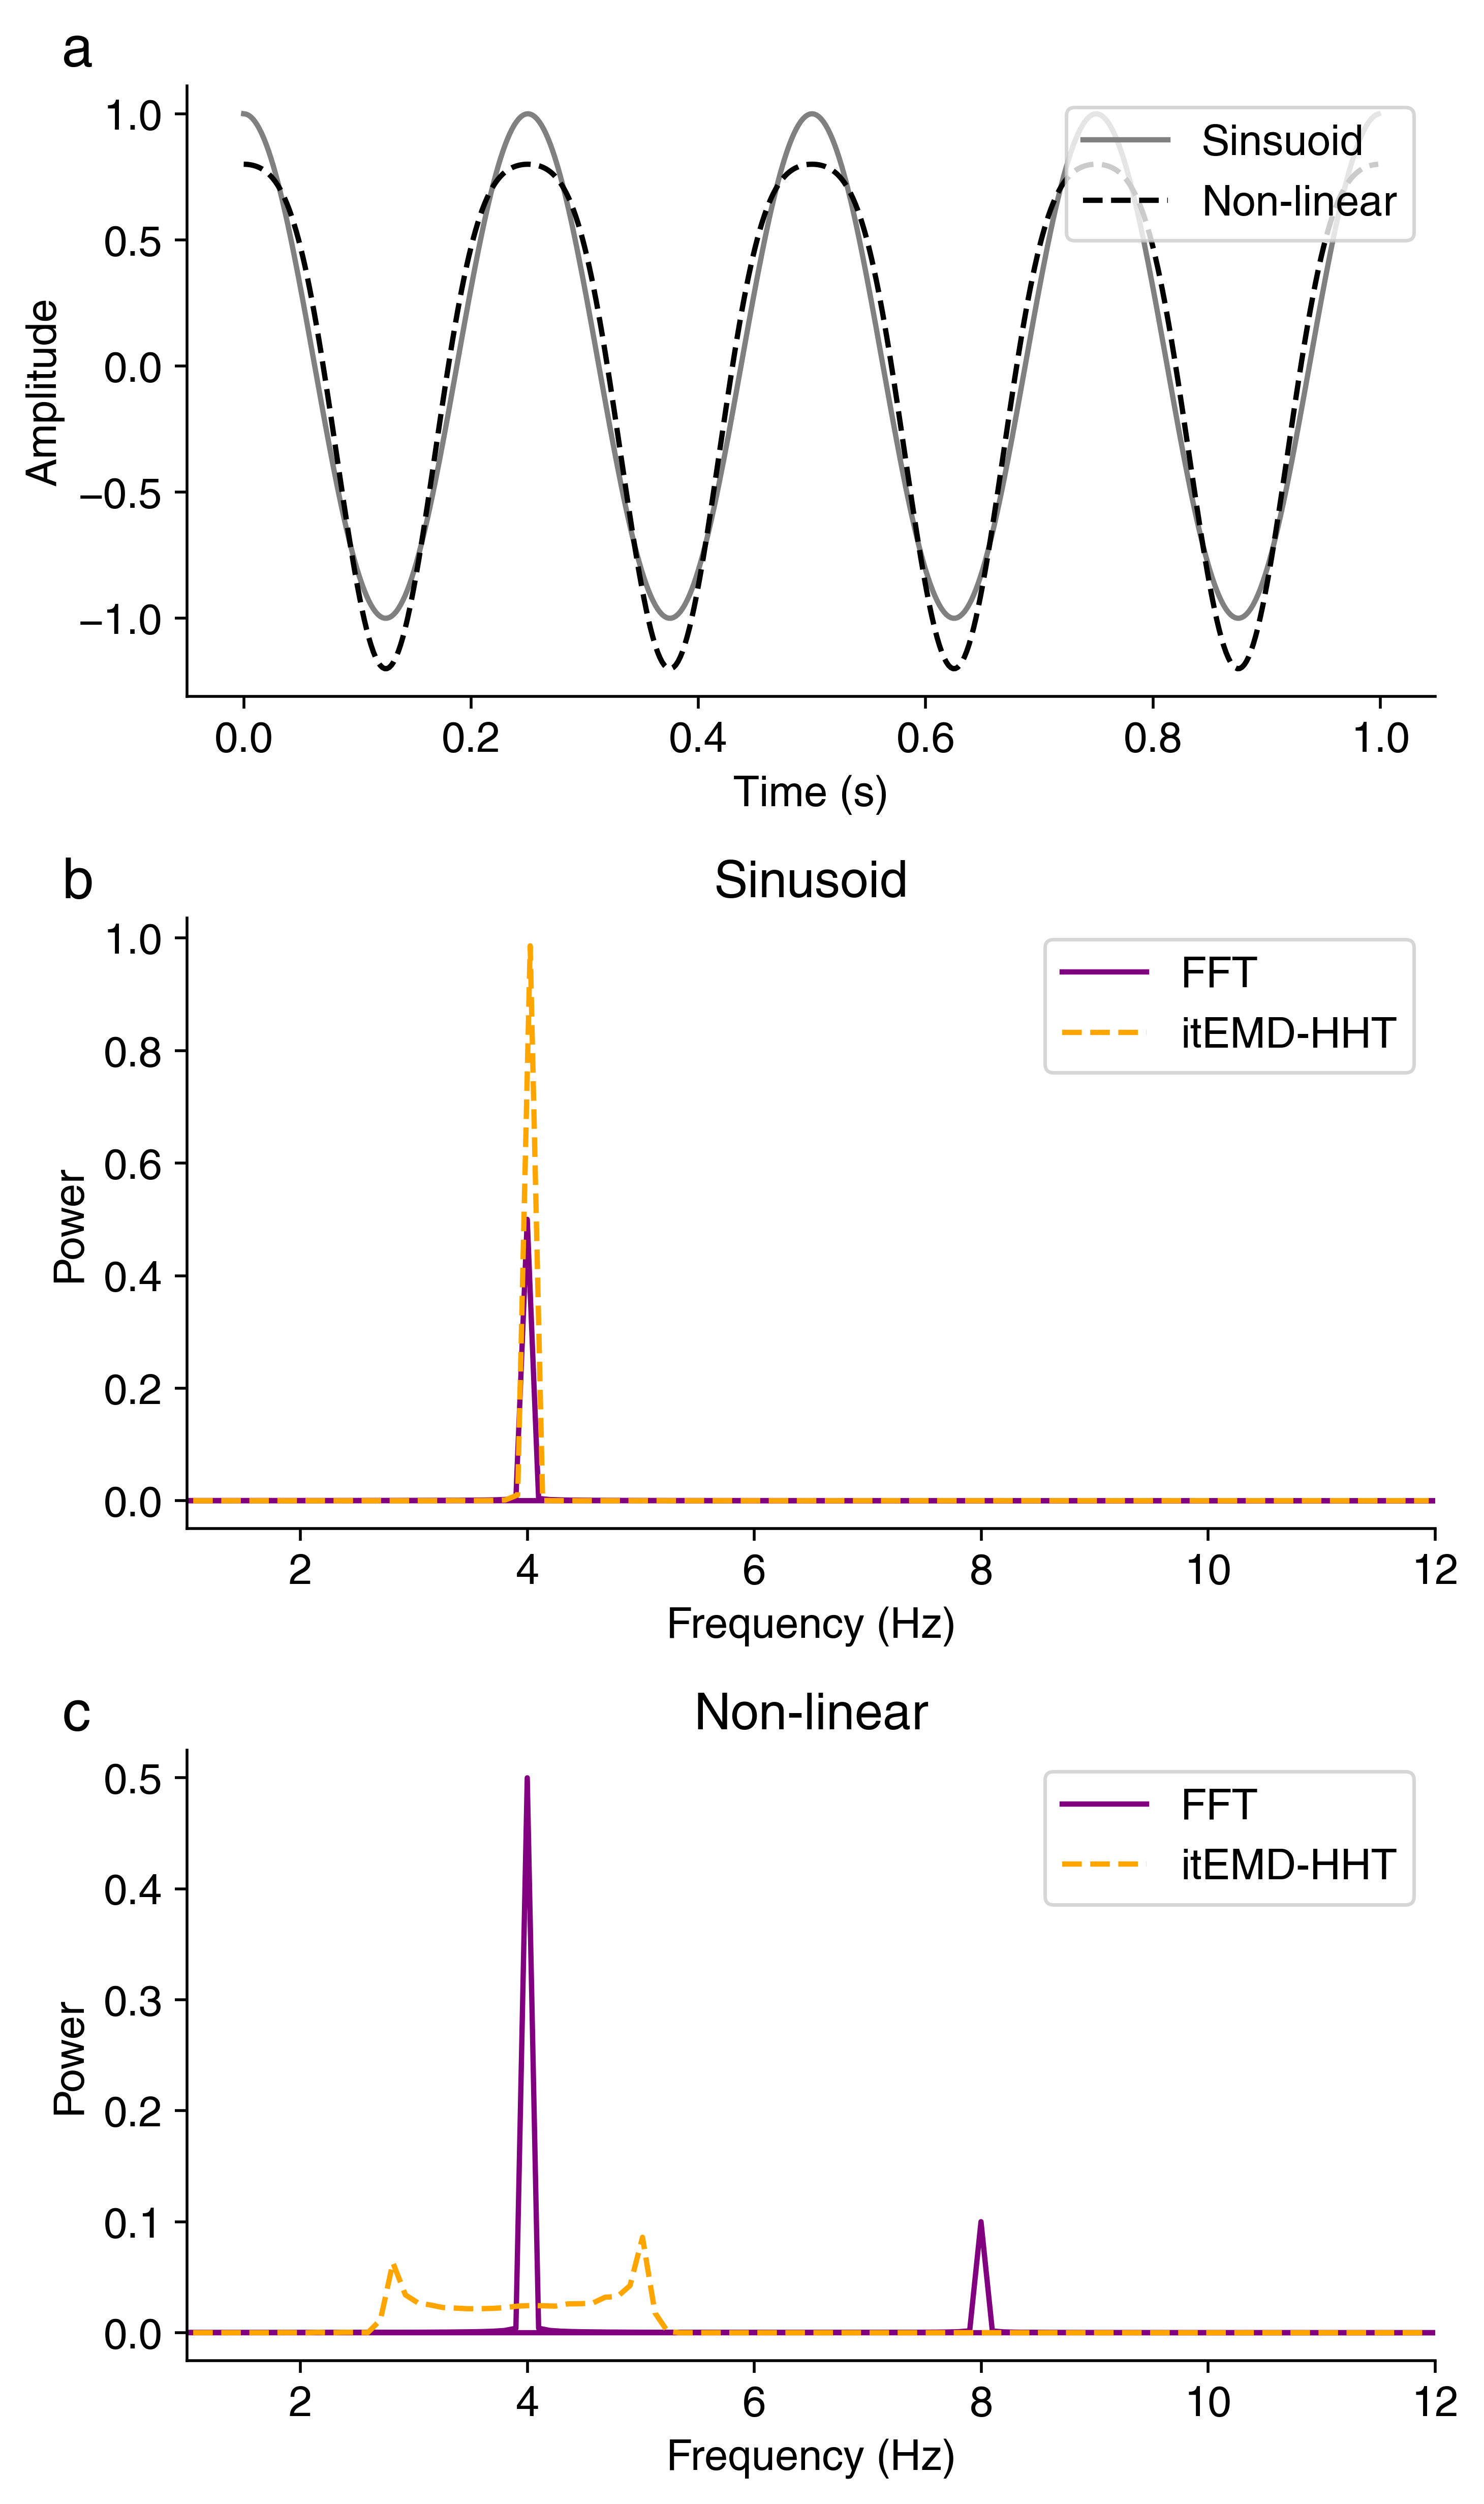

In [10]:
import emd
import numpy as np
from scipy import signal, ndimage
import matplotlib.pyplot as plt

sfreq = 500
seconds = 10
num_samples = sfreq*seconds

time_vect = np.linspace(0, seconds, num_samples)

freq = 4

# Sinusoidal signal
x = np.cos(2*np.pi*freq*time_vect)
# Non-linear signal  # \cos(2\pi f t) + \frac{1}{4}\cos(4\pi f t - \pi)
y = np.cos(2*np.pi*freq*time_vect) + 0.2*np.cos(2*np.pi*freq*2*time_vect-np.pi)

#fft
pxx = np.fft.fft(x) / len(x)
pyy = np.fft.fft(y) / len(x)
fft_f = np.fft.fftfreq(x.shape[0], d=time_vect[1]-time_vect[0])

#emd
imfs_x = emd.sift.iterated_mask_sift(x)
imfs_y = emd.sift.iterated_mask_sift(y)
if np.isnan(imfs_x[0]).any():
    bad_index = np.where(np.isnan(imfs_x[0]))[0]
    imfs_x = imfs_x[:,:bad_index[0]]
if np.isnan(imfs_y[0]).any():
    bad_index = np.where(np.isnan(imfs_y[0]))[0]
    imfs_y = imfs_y[:,:bad_index[0]]
#hht
IPx, IFx, IAx = emd.spectra.frequency_transform(imfs_x, sfreq, 'nht')
IPy, IFy, IAy = emd.spectra.frequency_transform(imfs_y, sfreq, 'nht')
fmin, fmax, res = 1, 12, 100
freq_edges, freq_centres = emd.spectra.define_hist_bins(fmin, fmax, res, 'linear')
f_x, hht_x = emd.spectra.hilberthuang(IFx, IAx, freq_edges, scaling='density')
f_y, hht_y = emd.spectra.hilberthuang(IFy, IAy, freq_edges, scaling='density')
hht_x[np.isnan(hht_x)] = 0
hht_y[np.isnan(hht_y)] = 0

# # Normalise as relative power
# pxx =  pxx / np.sum(np.abs(pxx))
# pyy =  pyy / np.sum(np.abs(pyy))
# hht_x = hht_x / np.sum(hht_x)
# hht_y = hht_y / np.sum(hht_y)


fig, ax = plt.subplots(3, 1, figsize=(6, 10))

ax[0].plot(time_vect[:sfreq], x[:sfreq], 'grey')
ax[0].plot(time_vect[:sfreq], y[:sfreq], 'black', linestyle='--')
ax[0].legend(['Sinsuoid', 'Non-linear'], loc='upper right')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
sns.despine()

ax[1].plot(fft_f, np.abs(pxx), 'purple')
ax[1].plot(f_x, hht_x, 'orange', linestyle='--')
ax[1].set_xlim(1, 12)
ax[1].legend(['FFT', 'itEMD-HHT'])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Power')
ax[1].set_title('Sinusoid', fontweight='bold')
sns.despine()

ax[2].plot(fft_f, np.abs(pyy), 'purple')
ax[2].plot(f_y, hht_y, 'orange', linestyle='--')
ax[2].set_xlim(1, 12)
ax[2].legend(['FFT', 'itEMD-HHT'])
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')
ax[2].set_title('Non-linear', fontweight='bold')
sns.despine()

# label panels
ax[0].text(-0.1, 1.1, 'a', transform=ax[0].transAxes, fontsize=16, fontweight='bold', va='top')
ax[1].text(-0.1, 1.1, 'b', transform=ax[1].transAxes, fontsize=16, fontweight='bold', va='top')
ax[2].text(-0.1, 1.1, 'c', transform=ax[2].transAxes, fontsize=16, fontweight='bold', va='top')

plt.tight_layout()

# save
plt.savefig('MS1_Figs/Supp_Fig1.png', dpi=500)